# Making a CMD for your Star Cluster


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("oh_table.csv")

In [3]:
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [4]:
G = df["G"].loc[df["group_id"] == 1] #this allows us to index this list! Each group will use their group id
J = df["J"].loc[df["group_id"] == 1]
d = df["distance"].loc[df['group_id'] == 1]

In [5]:
#for parallax, d=1/p because 1 is in AU, and absolute mag is absG = G - 5 log d + 5
absG = G - 5*np.log10(d) + 5
absGall = df["G"] - 5*np.log10(df["distance"]) + 5

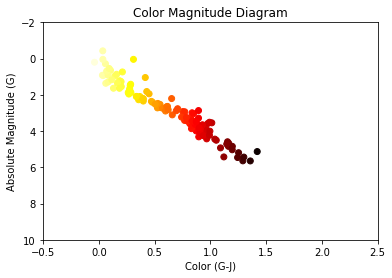

In [6]:
cm = plt.cm.get_cmap("hot_r")
plt.scatter(G-J, absG, c=G-J, cmap=cm)
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.show()

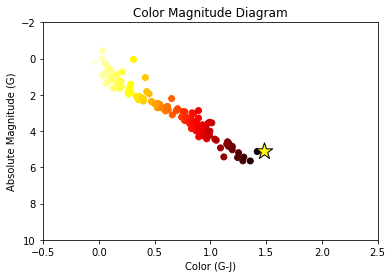

In [7]:
cm = plt.cm.get_cmap("hot_r")
plt.scatter(G-J, absG, c=G-J, cmap=cm)
plt.scatter(5.12 - 3.64, 5.12, marker = "*", s = 300, color = "yellow", edgecolor = "black")
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.show()

#### Next, add a second plot that adds the sun to your plot with a * marker.
Note: To show both plots on the same figure, you'll need to move the plt.show() command to the end of the code for the second plot.

#### Finished? Find the color and absolute magnitude of the sun and the average color and absolute magnitude for your cluster.

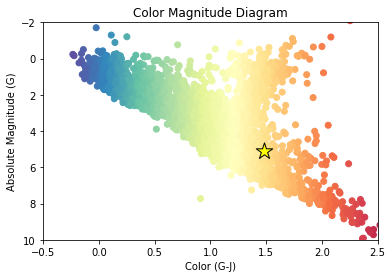

In [8]:
cm = plt.cm.get_cmap("Spectral_r")
plt.scatter(df["G"]-df["J"], absGall, c=df["G"]-df["J"], cmap=cm)
plt.scatter(5.12 - 3.64, 5.12, marker = "*", s = 300, color = "yellow", edgecolor = "black")
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.show()

In [9]:
df2 = pd.read_csv("bdnyc_sampledata.csv")
df2.head()

,Unnamed: 0,source_id,shortname,ra,dec,parallax,G,J
0,0,1,1658+1820,254.709737,18.333275,17.93,20.380,15.484
1,3,4,1448+1031,222.106791,10.533056,69.00,19.835,14.556
2,8,8,1728+0839,262.047250,8.666389,28.56,18.202,13.634
3,10,10,1731+2721,262.873917,27.356472,83.74,16.804,12.094
4,16,16,1301-1510,195.477670,-15.172858,32.27,19.373,14.538


In [10]:
G2 = df2["G"]
J2 = df2["J"]
D2 = 1 / df2["parallax"] 

In [11]:
am = G2 - 5*np.log10(D2) + 5

In [12]:
allG = df["G"].append(G2)
allJ = df["J"].append(J2)
dall = df["distance"].append(D2)

In [13]:
abs2 = allG - 5*np.log10(dall) + 5

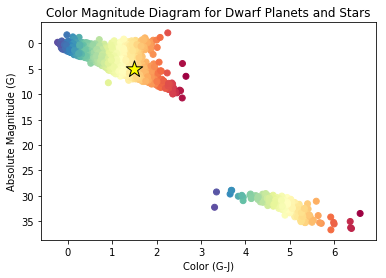

In [14]:
cm = plt.cm.get_cmap("Spectral_r")
plt.scatter(G2 - J2, am, c= G2 - J2, cmap=cm)
plt.scatter(df["G"]-df["J"], absGall, c=df["G"]-df["J"], cmap=cm, label = "Stars")
plt.scatter(5.12 - 3.64, 5.12, marker = "*", s = 300, color = "yellow", edgecolor = "black")
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram for Dwarf Planets and Stars')
plt.show()

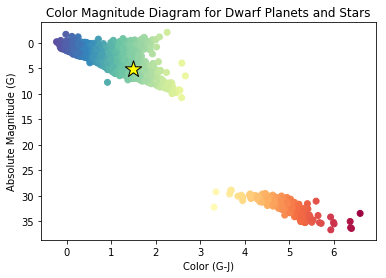

In [19]:
cm = plt.cm.get_cmap("Spectral_r")
plt.scatter(allG-allJ, abs2, c=allG-allJ, cmap=cm, label = "Stars")
plt.scatter(5.12 - 3.64, 5.12, marker = "*", s = 300, color = "yellow", edgecolor = "black")
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram for Dwarf Planets and Stars')
plt.savefig("Plots/CMD.png", dpi = 500)
plt.show()